# Estymatory największej wiarygodności

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
from scipy import optimize

# Zadanie 1
Napisz program, który losuje próbkę z rozkładu jednostajnego i rysuje funkcję gęstości rozkładu normalnego z parametrami $\mu=1$, $\sigma=1$. 

In [2]:
n = 10000
uniform = stats.uniform()
data = uniform.rvs(size=n)

In [3]:
data[:10]

array([0.01952874, 0.08500113, 0.69768348, 0.06040813, 0.51766132,
       0.1199386 , 0.97664871, 0.84473875, 0.48137858, 0.40495547])

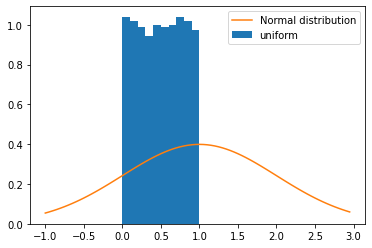

In [11]:
x = np.arange(-1, 3, 0.05)
fig, ax = plt.subplots(1, 1)
ax.hist(data, density=True, label="uniform")
ax.plot(x, stats.norm.pdf(x, 1, 1), label="Normal distribution") # gęstość rozkładu normalnego stats.norm.pdf()
ax.legend(loc="best")
ax.legend()
plt.show()

# Zadanie 2
Napisz program, który losuje próbkę z rozkładu jednostajnego i rysuje funkcję gęstości rozkładu normalnego z parametrami 

<ul>
<li>$\mu=\frac{1}{n}\sum_{i=1}^n x_i$</li>
<li>$\sigma=\frac{1}{n} \sum_{i=1}^n(x_i - \mu)^2$</li>
</ul>

mi = np.mean(x)

sigma = np.std(x)

In [22]:
n = 1000
uniform = stats.uniform(160, 5)
data = uniform.rvs(size=n)

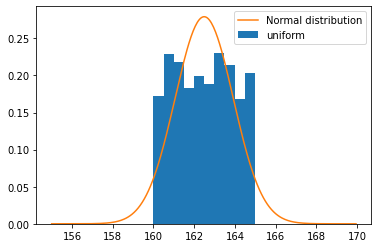

In [23]:
x = np.arange(155, 170, 0.05)
fig, ax = plt.subplots(1, 1)
ax.hist(data, density=True, label="uniform")
ax.plot(x, stats.norm.pdf(x, np.mean(data), np.std(data)), label="Normal distribution") # gęstość rozkładu normalnego stats.norm.pdf()
ax.legend(loc="best")
ax.legend()
plt.show()

In [24]:
np.mean(data)

162.49053088683414

In [25]:
np.std(data)

1.4289719942209758

# Zadanie 3
Napisz program, który losuje próbkę z rozkładu jednostajnego i rysuje funkcję gęstości rozkładu normalnego z parametrami otrzymanymi za pomocą funkcji <tt>fit()</tt> ze <tt>scipy.stats</tt>

In [26]:
stats.norm.fit(data)

(162.49053088683414, 1.4289719942209758)

# Zadanie 4

Wiemy, że funkcja wiarygodnosci ma postać:

$$
L(X,m,\sigma)=\prod_{i=1}^n f_{m,\sigma} (x_i).
$$


Zaimplementuj logarytmiczną funkcję wiarygodności  dla rodziny rozkładów normalnych:

$$
l(X,m,\sigma)=\ln\left( L(X,m,\sigma) \right)=\ln\left(\prod_{i=1}^n f_{m,\sigma} (x_i) \right)=\sum_{i=1}^n \ln(f_{m,\sigma} (x_i))
$$

1) funkcja która oblicza wartośc funkcji gęstości prawdopodobieństwa w danym x dla danych mi oraz sigma

2) liczymy logarytm z tej funkcji

3) sumujemy po wszystkich wartościach

4) dwoma forami przechodzimy po siatce parametrów i znajdujemy wartości dla których funkcja wiarogodności przyjmuje wartość maksymalną

In [30]:
np.pi

3.141592653589793

In [31]:
np.e

2.718281828459045

In [35]:
data[:10]

array([161.32169222, 163.39035716, 164.17649576, 163.20223637,
       164.18833831, 164.29848371, 163.25500785, 163.71633489,
       164.89325013, 163.85171081])

In [33]:
def gpdf(x, mi, sigma):
    return 1/(sigma * np.sqrt(2 * np.pi)) * np.e**(-(x-mi)**2/(2*sigma**2)) 

In [40]:
s = 0

for x in data:
    s += np.log(gpdf(x, 100, 2))

In [45]:
s

-490000.6371485944

In [44]:
sum([np.log(gpdf(x, 100, 2)) for x in data])

-490000.6371485944

In [42]:
for po wartościach mi od 150, 170:
    for po wartościach sigma od 1 do 2 co 0.1:
        sum([np.log(gpdf(x, mi, sigma)) for x in data]) #dodać ładnego printa

SyntaxError: invalid syntax (<ipython-input-42-03291cac42ae>, line 1)

# Zadanie 5
Policz MLE dla danych z rozkładu jednostajnego i parametrów:
<ul>
<li>$\mu=0$, $\sigma=1$</li>
<li>$\mu=0$, $\sigma=2$</li>
<li>$\mu=1$, $\sigma=1$</li>
<li>$\mu=0.5$, $\sigma=0.2$</li>
</ul>
Dla których wartości wychodzi wynik największy i dlaczego?

# Zadanie 6
Zapoznaj się z funkcją <tt>optimize.fmin_cg</tt>
https://docs.scipy.org/doc/scipy-0.19.0/reference/generated/scipy.optimize.fmin_cg.html
i znajdż minimum funkcji

$$
f(x,y) = (x+1)^2+y^2
$$

# Zadanie 7
Zminimalizuj funkcją wiarygodności z Zad. 5 (numerycznie).

Czy wyniki są podobne do wyniików z poprzednich zadań?

# Zadanie 8
Zaimportuj dane <tt>datasets</tt> i wyestymuj rozkład normalny i Split Normal dla <tt>boston.data[:,7]</tt>.

Rozpocznij procedurę minimalizacji od warunku początkowego:

<ul>
<li>mu=np.mean(data)</li>
<li>sigma=np.std(data)</li>
<li>tau=np.std(data)</li>
</ul>

Który rozkład lepiej pasuje do danych?

In [1]:
from sklearn import datasets
boston = datasets.load_boston()